In [1]:
# Preload matplotlib, julia and sympy
import matplotlib.pyplot as plt
import numpy
import sympy
from BondGraphTools.config import config
sympy.init_printing()
%matplotlib inline
config.julia # This preloads julia.

# _Systems all the way down_
## Managing Complexity with BondGraphTools

&nbsp;

&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp; Dr. Peter Cudmore.  
&nbsp;&nbsp;&nbsp;&nbsp; Systems Biology Labratory,   
&nbsp;&nbsp;&nbsp;&nbsp; The School of Chemical and Biomedical Engineering,  
&nbsp;&nbsp;&nbsp;&nbsp; The University of Melbourne.  

Abstract
----------

Many problems in biology, ecology and engineering involve predicting and controlling complex systems, loosely defined as interconnected system-of-systems. Such systems can exhibit a variety of interesting non-equilibrium features such as emergence, phase transitions and other multi-scale phenomenon which result from mutual interactions between subsystems.

Constructing and analysing models of complex systems is often a non-trivial task due to the high dimensionality, heterogeneity and nonlinearity of the system in question. Mathematicians and scientists alike need tools, computational tools in particular, to manage the complexity of their dynamical systems models.

In this talk we introduce `BondGraphTools` a systems modelling framework, and discuss how to model and simulate complex physical systems without making the models unwieldy, breaking the laws of physics, or doing any of the tedious stuff by hand.

## Outline of talk

* Prediction and control of complex systems necessary.
* For heterogenous systems specifity is required and scale is a problem.
* The initial problem is how to capture and represent these systems.
* The solution is `BondGraphTools` which 

    a) bases our model on physical principals (extension of portHamiltonians)
    
    b) use modelling paradigms build on multi-scale abstraction (object oriented programming)
    
    c) implement our solution in a sustainable framework (python/julia) 



## Table of Contents

1. Introduciton
2. Hamiltonian, portHamiltonians and Energetic Systems
3. BondGraphTools

# Section 1: Introduction

<center> <img src="images/map.png"> </center>

Metabolism
--------------
* Intel 8086 cpu has 29,000 transistors. (wiki)
* Current Metabolites w/Proteins (Enzymes and Transporters) of 23,478 see [2]
* *At least* as difficult as reverse engineering a microprocessor.
* 'phase transitions' i,e; disease->healthy.
* Secondary effects of intervention.

Systen features: network toplogy, dynamics, nonlinear, feed-back/forward loops.

Metabolism is the power source of the cell and is responsible for turning raw materials, such glucose, into resources for other cellular action. Metabolism engineering is already a staple in synthetic biology but there are great difficulties translating results obtained from flux-balance analysis (FBA), which are suitable in stritcly controlled lab environments, to real-world situations where steady-state and optimal growth assumptions are clearly invalid.
Understanding how metabolism works in of great interest for cancer theraputics, since a reprogrammed metabolism is a 'hallmark of cancer mutations'. 

Metabolic maps are a repsentation of a _network_ in that each node represents a metabolite, and each edge usually represent a protien that cataylses the reaction from one metabolite to another. When spatial effects are ignored, the reactions are often described by nonlinear differential equations. Clearly observable are instances of cycles, feedback  and feed-forward loops.

Modern metabolohmics [2] puts the number of metabolics with associated protiens in tens-of-thousands each corresponding to a dynamic process. As a point of refernce, the 8086 cpu, an early precursor to the modern digital computer and the beginning of very-large scale integration (VLSI) fabrication for integrated circtuis, had approximately 30,000 transistor. The implication is that reverse engineering metabolic network (let alone any of the other celluar processes) is _at least_ as difficult as reverse engineering early cpus.

Essential, one wishes to understand non-equilibrium states of a metabolic system which can be understood traditional problems in non-autonomous nonlinear dynamics; finding critical manifolds and making parameter (and forcing) dependanices clear, so as to predicable be able to control the dynamics of the system. For example to optimise metabolic throughput, to identify protiens required to move the metabolism from a 'diseased' dynamic state to a 'health' state, or to predict the systemic outcome of pharmaceutical interventions.

It is obvious then that one great challenge for a systems-level description of metabolism comes from the _scale_ of the problem. One can think of this as a question of 'emergence', how macro-scale phenomonom depend on the network configuration parameters. 

A separate great challenge is the question of how to mathematically manipulate large hetereogenous systems and how to navigate between the different levels of abstraction; from statistical, to simplified, to sucessively detailed. 
That is, how does one handle a system of systems. 

<table width=100% style="text-align:center">
    <tr style="background-color:#FFFFFF">
        <td>
            <h3>
                <center>Smart Grids</center></h3>
        </td>
        <td><h3><center>Techno-Ecological processes</center></h3>
        </td>
    </tr>
    <tr  style="background-color:#FFFFFF;">
        <td><img src="images/SmartGrid-graphic.jpg" width=90% align="left"> </td>
        <td><img src="images/TESnetwork.jpg" width=90% align="right"></td>
    </tr>
</table>

Smart Grids
-------------

* Confliting issues: energy->well being (See [5,6]) esp. education, mortality, poverty, etc. 
* carbon emissions->climate change.
* Smart grids integrate new renewables with 'base-line' power supply.
* Many sources, storage, and sinks; need for automatic control and stabilisation.


Features: multiple-time scale, correlated noise, feedback, very heterogenous.

Process Engineering
---------
* Cooperatively coupling processes for 'techno-ecological synergies'.
* Sustainable, economical and efficient.
* Ecosystems many moving parts. Need to know how to engineer and optimise.

Managing the impact of anthropogenic climate change appears to be one of the biggest challenges facing humanity over the coming decade, and is further complicated by the mounting evidence that cheap, readily available electricity is highly correlated with many measures of human well being [5,6] particularly access to education, poverity and mortality as well as seemingly unrelated metrics like levels of gender equality and personal freedom.

There has been considerable interest in augmenting base-line power supply (which makes up the bulk of Co2 production), with decentralised renewable technologies and mass storage so as to reduce the carbon footprint of national powergrids [3]. Balancing energy security with carbon foorprint then becomes a prediction and control problem involving the system dynamics of a noisy, heteroenous network of energy sources, storage and sinks; systems in their own right.

There are many other examples of large, networked dynamical systems we would like to understand including but not limited to; ecosystems, markets, public infrastrucure and large scale industrial/engineering processes. Understanding how these systems work, and most importantly, how to pair parameter changes with qualitative behaviour is an active area of reseach in applied dynamical systems and interdisciplinary science.

*We want to predict and control energetic systems-of-systems*
-------

For our purposes a dynamic system is *system-of-systems* when:

* It is made up of many moving parts, or subsystems (High-dimensional).
* The subsystems are not all of the same type (Heterogenenous).
* The subsystems are complicated (Nonlinear and/or Noisy).
* There are well defined boundaries between the subsystems (Network Topology).

By *energetic system*, we mean that *energy* is the quantity that is exchanged between subsystems.

> There is a fact, or if you wish, a law, governing all natural phenomena that are known to date. There is no known exception to this law—it is exact so far as we know. The law is called the conservation of energy. 

\- R. Feynman, 1963. http://www.feynmanlectures.caltech.edu/I_04.html

Hetereogeneity and High Dimension means it is often difficult to apply statistical techniques.

Necessary for

* engineering biological systems,
* ensuring energy security in a changing climate,
* managing macroeconomics and organisation behaviour,
* large scale industrial design and construction.

For our purposes, an example of a system-of-systems that is not _complex_ is a coupled oscillator system.
Whist a coupled oscillator system is indeed nonlinear and high dimensional, and often networked and/or noisy they are however usually only weakly hetereogenous. Coupled oscillator systems can nonethelesss produce interesting and relavent behaviour.

Without the heterogeneity condition, one might be able to at least formulate how to navigate between mechanism and system level statistics. Actually doing this is often not even slightly trivial, and is of great interest to mathematicians in the nonlinear sciences.

With the heterogeneity condition there are not yet clear ways to simplify the relationship between mechanisms and macroscopic statistics.

*We want to predict and control complex energetic systems*
-------

For a _particular_ system-of-systems we want to:
* Talk about qualitative properties such as existence, stability and bifucations of macroscopic phenomena.
* Estimate parameters and states from limited, noisy datasets so as to make predictions. 
* Design, evaluate and optimise control schemes.

In the case of large systems-of-systems we need: 
* _Representations_ of networked dynamical systems that are manageable.
* _Automation tools_ for system capture, simplification and analysis.

The essential question in complex system science is: _given a complex system, how can we identify the system topology, describe the subsystem dynamics, and control the emergent phenomonom._

For complex heteroenous systems, the first big problem one must contend with is _how to represent them_. For example, if a system has 1000 components, we would prefer not to have to write 1000 equations out. 

In other words, we need some way to bundle together funcionally related, or _encapsulate_ subsystems. Since we're talking about systems-of-systems, we clearly must also have _composition_ (has-a relationships) and _inheritance_ (is-a relationships).

Due to the scope and scale of the problems, we don't want to be doing this by hand!

## Existing Approaches to Energetic Modelling

Existing approaches seek to integrate port based approaches with classical mechanics, which are often solved in either specialised toolkits inside mathematical software suites, or inside computer aided design (CAD) software.

Energetic system representations include:
- Ad-hoc modelling.
- Bond Graphs.
- Port Hamiltonians.

Implementations include:
- Simulink(MATLAB)
- SystemsModeller (Mathematica)
- MapleSim (Maple)
- Dymola, 20-sim, openModelica, MTT

Issues:
- pH enforce a particular structure to the model equations; that may not match observations
- Bond Graphs, which can be thought of a generalisation of 2-port passive circutis, have some features that preclude some desired properties; 'the nodes care about the orientation of the edges'.
- Maths software lack the features of a GP programming language.
- Closed source/CAD software lack the ability to integrate with other software; 'they do too much'.

## A solution (representation)

### 'Energetic Systems' as OOP

Object Oriented Programming (OOP) is a software development paradigm that seeks to manage large, complicated projects by breaking problems into _data_ plus _methods_ that act on the data. 

Three big ideas in OOP are:
1. _Inheritance_ or is-a relationships. 
2. _Composition_ or has-a relationships.
3. _Encapsulation_ or infomation hiding.


This allows for _hierarchical_ and _modular_ design which reduces model complexity.

## A solution (automation)

### Sustainable Software via `BondGraphTools`

Sustainable software is:
- Open source
- Easy to install and use.
- In a common language with standard dependencies.
- Well documented.
- Iteratively developed 
- Limited in scope.
- Continuously tested.
- Version controlled.

&nbsp;  

&nbsp;  

&nbsp;  


# Object Oriented Modelling for Dynamical Systems 

&nbsp;

Inheritance, Composition and Encapsulation

## Inheritance

&nbsp;

For networked dynamic systems, _inheritance_ means we have:
- conditions on the dynamical sub-systems.
- a description of the interface between nodes.


![Inheritance](images/inheritance.svg)

### Definition (Energetic System)

An energetic system is a tuple $(M, \mathcal{D}, U,\Phi)$
where the
* *state space* $M$ is a manifold of $\dim(M) = m\ge 0$
* *port space* $\mathcal{D} \subset \mathcal{F} \times \mathcal{E}$ where, $\mathcal{E} = \mathcal{F}^*$ and $ \dim{\mathcal{D}} = \mathcal{F}|_\mathcal{D} =n$. 
* *control space* $U \subset C^r:\mathbb{R}_+ \rightarrow \mathbb{R^k}$ with $k\ge 0$ 
* *constitutive relation* is a smooth map $\Phi: TM \times \mathcal{D} \times U\times\mathbb{R}_+ \rightarrow
  \mathbb{R}^{m+n}$  
    such that
  $$\Phi\left(\frac{dx}{dt},x,f,e,u,t\right)=0.$$

$\Phi$ relates the _internal state_ $M$ and the _external environment_ (via $\mathcal{D}$).  



&nbsp;


&nbsp;

![Energetic System](images/EnergeticSystems.svg)


&nbsp;

&nbsp;

The incoming *power* is $P_\text{in} = \left<e,f\right>$ for $(f,e)\in \mathcal{D}$

* Energetic system is a 'Dynamic System' in the traditional sense if  e,f are empty. CR is a evolution rule
* generalisation of Port-Hamiltonians, which itself is a generalisation of 'Bond Graph' modelling, see [8].
* state space -> local co-oridnates of a system.
* port space -> effort amnd flow, much like voltage/current, force/velocity analogies.
* control space differentiability depends on 'index' of DAE
* CR is a relationship between the diff'able manifold and power variables
* CR in a sense defines a component


## Inheritance

For energetic systems-of-systems:

### Nodes are particular _energetic systems_ 
Each node is described by a set of differential-algebraic equations $\Phi(\dot{x},x,e,f) = 0$.

### Edges are constraints on port variables.

An edge represents how state is shared between systems.

![Inheritance](images/inheritance.svg)

Talk about examples.

## Composition

&nbsp;

For networked dynamic systems _composition_ means that we can replace nodes with subgraphs and vice-versa.

![Composition](images/composition.svg)

## Corollary (Composition)
If $\Psi_1 = (M_1, \mathcal{D}_1, U_1,\Phi_1)$ and $\Psi_2 = (M_2, \mathcal{D}_2, U_2,\Phi_2)$  are energetic systems, then 

$$\begin{eqnarray}\Psi_0 &=& \Psi_1 \oplus\Psi_2\\
&=& 
\left(M_1\oplus M_2,\mathcal{D}_1 \oplus\mathcal{D}_2,U_1\oplus U_2, \Phi_1\oplus\Phi_2\right)
\end{eqnarray}$$
is also an energetic system.

Suppose (abusing notation) $\Psi_0 = (\Psi_1,\Psi_2)$ is an energetic system with ports 

$$(e_i, f_i) \in \mathcal{D}_1, \quad (e_j,f_j)  \in \mathcal{D}_2$$

Then $\Phi_0$ with the additional power conserving constraint 

$$e_i - e_j = 0\qquad f_i+f_j=0$$

is also a energetic system.

![Composition](images/composition.svg)

## Encapsulation

&nbsp;

For a networked dynamical system _encapsulation_ means that we can apply simplification methods to a subgraph so that the replacement system is less complicated, while representing the same behaviour.

&nbsp;

One can also go the other way by replacing a node with a more complicated subgraph.

&nbsp;


...hence _systems all the way down_.

![Encapsulation](images/encapsulation.svg)

## Example (Duffing Oscillator)
### Composed System
The composition of  

$$\Phi_1^T =\left(\dot{x_1} - f_1,\ e_1 - \frac{x_1}{\omega} - \frac{x_1^3}{\mu}\right)$$  
$$
\Phi_2^T =\left(\dot{x_2} - e_2,\ f_2 - x_2\right)
$$  

with the port mapping  

$$e_1 - e_2 = 0 \qquad f_1 + f_2  = 0$$  

is the system is given by  

$$\Phi_0^T  = \left(\dot{x}_1 + x_2,\ \dot{x}_2 - \frac{x_1}{\omega} - \frac{x_1^3}{\mu}\right) = 0 $$

![Encapsulation](images/encapsulation.svg)

## Object Oriented Modelling and Energetic Systems

Energetic systems provide:
- _Inheritance_; an abstract base representation of energetic systems.
- _Composition_; a way to hierarchically compose systems of systems.
- _Encapsulation_; a framework inside which simplifications can occur.

&nbsp;  

&nbsp;  

&nbsp;  

#  Introducing `BondGraphTools`

## `BondGraphTools` a `python` library for energetic systems.

`BondGraphTools` (https://github.com/BondGraphTools) a framework for modelling energetic systems.
* Based upon an extension of bond graph and port-Hamiltonian modelling.
* Provies a simple, *minimal* object-oriented interface for constructing, composing and simulating models.
* Implemented in `python` and uses the standard `scipy` stack.
* Computational 'grunt' is provided via `julia` and `DifferentialEquations.jl`.
* Developed with sustainable software practices.
* Intended to be used in _conjunction_ with other tools.

'Bond Graphs' are a multi-domain port-based graphical modelling technique used predominantly in mechatronics.  
Port-Hamiltonian systems integrate geometric approaches from classical mechanics and control theory with port based modelling.  

## Example (Duffing Oscillator)

The Duffing oscillator consists of the conservation of force between kinetic energy and a nonlinear potential.

&nbsp;

![Heirarchical System](images/ComplexEnergeticSystem.svg)

In [2]:
# Import Tools
from BondGraphTools import new, add, connect

# Nonlinear Potential Energy
phi_1 = new("PH",  value="x^2/2 +x^4/4")

# Linear Kinetic Energy
phi_2 = new("I", value=1) 

# Conservation Law
phi_3 = new("0") 

# Control Source
source = new("Sf") 

# Composed system
phi_0 = new(name="Duffing Model")
add(phi_0, phi_1, phi_2, phi_3, source) 

# Constraints
connect(source, phi_3)
connect(phi_3, phi_2)
connect(phi_3, phi_1)

phi_0.constitutive_relations

## Example (Duffing Osc)

Numerical solvers respect constraints!

![Heirarchical System](images/ComplexEnergeticSystem.svg)


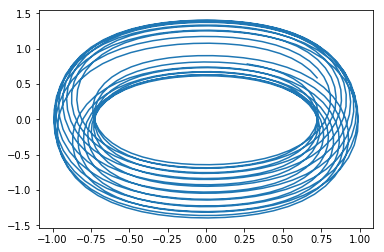

In [3]:
from BondGraphTools import simulate
from matplotlib.pyplot import plot

u = "0.3*sin(0.6*t)"
t,x = simulate(phi_0, 
               x0=[0, 1], 
               timespan=[0,100], 
               control_vars=[u])

_ =  plot(x[40:,0], x[40:,1]) 

## Automation

If you can build one, you can build many!

By wrapping the Duffing example inside a method, defining a port, and returning the resulting system-of-systems, one can implement a _factory_ method, that creates new Duffing oscillators. 

![Heirarchical System](images/ComplexEnergeticSystem.svg)

In [ ]:
from BondGraphTools import expose

def duffing_factory(name="Duffing Osc", freq=1):
    """Makes Duffing Oscillators!"""

    potential = "x^2/(2*{w}) + 0.00025*x^4".format(w=1/freq)

    phi_1 = new("PH", value=potential)
    phi_2 = new("I", value=1) 
    phi_3 = new("1") 
    phi_4 = new("R", value=0.001)
    port = new("SS")

    phi_0 = new(name=name)
    add(phi_0, phi_1, phi_2, phi_3, phi_4, port) 
    connect(port, phi_3)
    connect(phi_3, phi_4)
    connect(phi_3, phi_2)
    connect(phi_3, phi_1)
    expose(port)

    return phi_0

model = duffing_factory()
model.constitutive_relations

## Batteries Included!

`BondGraphTools` is built on the scientific python ecosystem.

In [ ]:
import sympy 
oscillator_array = new(name="All-to-all Duffing")

junction_law = new("0")
common_field = new("C", value=sympy.S('K'))

add(oscillator_array, common_field, junction_law)
connect(common_field, junction_law)

frequencies = [1/2,1/3,1/4,1/5,1/6]

for i, freq in enumerate(frequencies):    
    # Create a new oscillator
    osc_i = duffing_factory(f"Osc{i}", freq=freq)

    # Add it to the array
    add(oscillator_array, osc_i)
    
    # Connect it to the junciton law
    connect(junction_law, osc_i)

In [ ]:
eqns = oscillator_array.constitutive_relations
for eqn in eqns:
    print(sympy.latex(eqn))

## Example (Exploring Synch in Duffing Arrays)


In [ ]:
# Define state
x_0 = {x:'1.0' for x in oscillator_array.state_vars}
timespan = [0,40]

In [ ]:
# Set a numerical paramter for K
common_field.set_param("C", 100)

t, x = simulate(oscillator_array, 
                x0=x_0, timespan=timespan)

fig_1 =  plot(t, x[:,1:])

In [ ]:
# Change the Parameter, simulate again!
common_field.set_param("C", 10)

t, x = simulate(oscillator_array,
                x0=x_0, timespan=timespan)

fig_2 =  plot(t, x[:,1:])

&nbsp;

&nbsp;

&nbsp;


# Conclusion

## Current State of `BondGraphTools`

- Current version on PyPI is 0.3.6 https://pypi.org/project/BondGraphTools/
- Documentation at https://bondgraphtools.readthedocs.io
- Source at https://github.com/BondGraphTools/
- In active use inside the Systems Biology Lab @ UniMelb
- Can _programmatically_ build arbitrarily large models and simplify network constraints.

## Plans for v0.4 and v0.5
- Robust parameter and control value network.
- Interface for measuring port space.
- Algorithmic model reduction (particularly manifold reductions).
- Bifurcation analysis (particularly fixed point tracking).

# Thanks for listening

Thanks to
- Prof. Edmund Crampin 
- The Systems Biology Lab at The University of Melbourne
- Cecilia Gonzalez-Tokman and Robby Marangell
- AustMS 2018 Organisers



<table >
    <tr style="background-color:#FFFFFF;">
        <td><img src="images/PRIMARY_A_Vertical_Housed_RGB.png" alt="University of Melbourne" width=50% align="center"></td>
        <td><img src="images/cbns-logo.png" alt="ARC CEnter of Excellence in Convergent Bio-Nano Science and Technology" width=100% align="center"></td>
    </tr>
</table>

&nbsp;

&nbsp;

&nbsp;

# Please check out `BondGraphTools`

# https://github.com/BondGraphTools/

References
--------------
[1] Human Metabolism Map https://www.vmh.life

Alberto Noronha, Anna Dröfn Daníelsdóttir, Piotr Gawron, Freyr Jóhannsson, Soffía Jónsdóttir, Sindri Jarlsson, Jón Pétur Gunnarsson, Sigurður Brynjólfsson, Reinhard Schneider, Ines Thiele, Ronan M T Fleming; ReconMap: an interactive visualization of human metabolism, *Bioinformatics*, Volume 33, Issue 4, 15 February 2017, Pages 605–607, https://doi.org/10.1093/bioinformatics/btw667

[2] Human Metabolome database: http://www.hmdb.ca

Wishart DS, Tzur D, Knox C, et al., 
HMDB: the Human Metabolome Database. 
Nucleic Acids Res. 
2007 Jan;
35(Database issue):D521-6. 17202168 

[3] Smart Grid Map: http://smartgrid.epri.com
Image courtesy of the Electric Power Research Institute.

[4] Techno-Ecological Synergies

Robert A. Urban, Bhavik R. Bakshi, Geoffrey F. Grubb, Anil Baral, William J. Mitsch,
Towards sustainability of engineered processes: Designing self-reliant networks of technological–ecological systems,
Computers & Chemical Engineering,
Volume 34, Issue 9,
2010,
Pages 1413-1420,
https://doi.org/10.1016/j.compchemeng.2010.02.026.

[5] Jessica G. Lambert, Charles A.S. Hall, Stephen Balogh, Ajay Gupta, Michelle Arnold,
Energy, EROI and quality of life,
Energy Policy,
Volume 64,
2014,
Pages 153-167,
https://doi.org/10.1016/j.enpol.2013.07.001.

[6] Cesar Pasten, Juan Carlos Santamarina,
Energy and quality of life,
Energy Policy,
Volume 49,
2012,
Pages 468-476,
https://doi.org/10.1016/j.enpol.2012.06.051.

[7]
Feynmann Lectures: http://www.feynmanlectures.caltech.edu/I_04.html

[8] Port Hamiltonians and Dirac Structures
http://www.math.rug.nl/arjan/DownloadVarious/PHbook.pdf

A.J. van der Schaft, D. Jeltsema,  
Port-Hamiltonian Systems: An Introductory Overview,  
NOW Publishers, Boston/Dordrecht, 2014.

[9] San Miguel, M., Johnson, J.H., Kertesz, J. et al. Challenges in complex systems science. Eur. Phys. J. Spec. Top. (2012) 214: 245. https://doi.org/10.1140/epjst/e2012-01694-y

[10] N. N. Pavlova, C. B. Thompson, The emerging hallmarks of cancer metabolism. Cell Metab. 23, 27–47 (2016). https://doi.org/10.1016/j.cmet.2015.12.006

[11] Hiroaki Yoshimura, Jerrold E. Marsden, Dirac structures in Lagrangian mechanics Part I: Implicit Lagrangian systems, Journal of Geometry and Physics, Volume 57, Issue 1, 2006, Pages 133-156.
https://doi.org/10.1016/j.geomphys.2006.02.009.

[12] M. Dalsmo and A.J. van der Schaft. A Hamiltonian Framework For Inteconnected Physical Systems